In [2]:
library(goseq)
library(stringr)
library(dplyr)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
load("/Tan2021/detected_markergenes.RData")
load("/Tan2021/all_gads.RData")
load("/Tan2021/Tan2021_results.RData")
all = rownames(all)
library("org.Mm.eg.db")
symbols <- mapIds(org.Mm.eg.db, keys = all, keytype = "SYMBOL", column="ENSEMBL")
symbols = symbols[!duplicated(symbols)]
symbols = symbols[!is.na(symbols)]
all_genes = rep(0, length(symbols))
names(all_genes) = symbols

pbmc.markers$gene <- mapIds(org.Mm.eg.db, keys = pbmc.markers$gene, keytype = "SYMBOL", column="ENSEMBL")
pbmc.markers = pbmc.markers[!duplicated(pbmc.markers$gene), ]
pbmc.markers = pbmc.markers[!is.na(pbmc.markers$gene), ]
pbmc.markers$cluster = gsub(" ", "_", pbmc.markers$cluster)
pbmc.markers$cluster[pbmc.markers$cluster == "Cortical_L2–5_Pyramidal_Cell"] = "Cortical_L2-5_Pyramidal_Cell"

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, ta

[1] "Adult_Astrocyte"


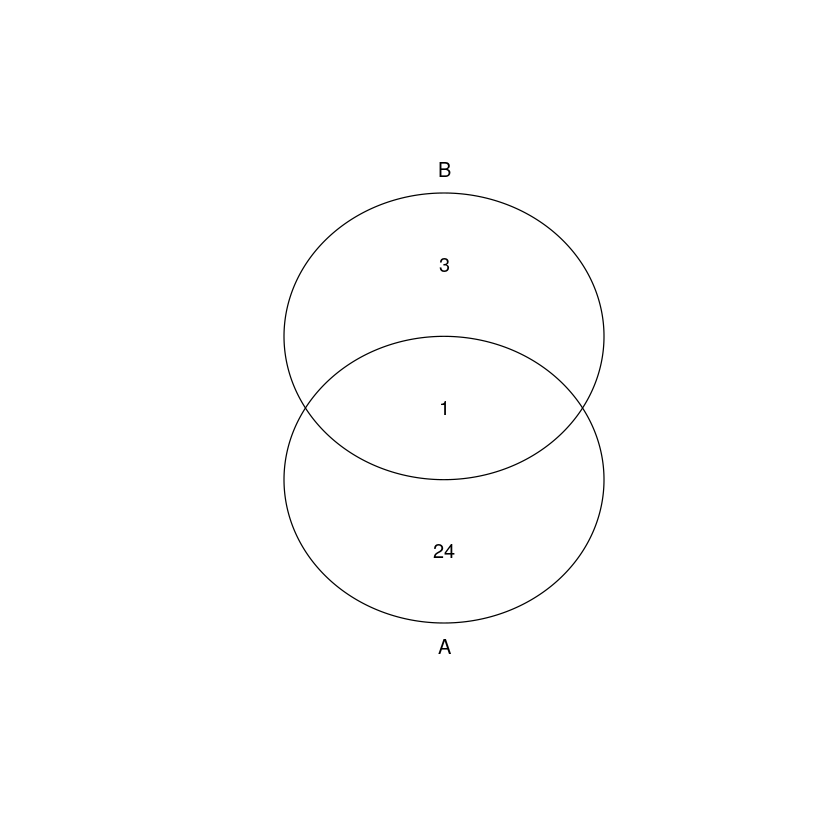

[1] "Cortical_L2-5_Pyramidal_Cell"


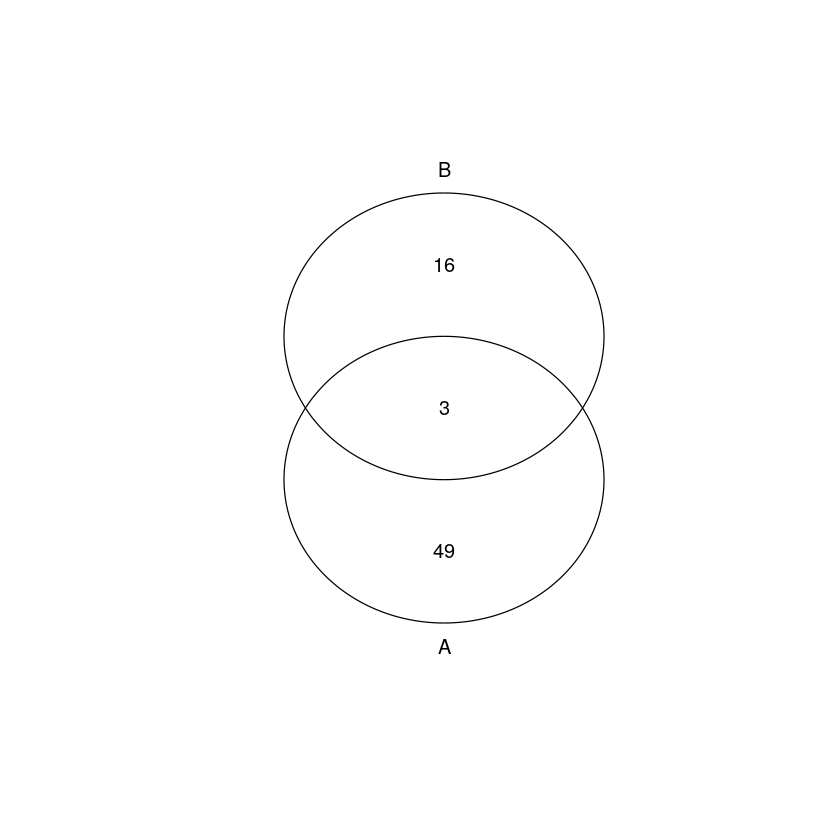

[1] "Cortical_L6_Pyramidal_Cell"


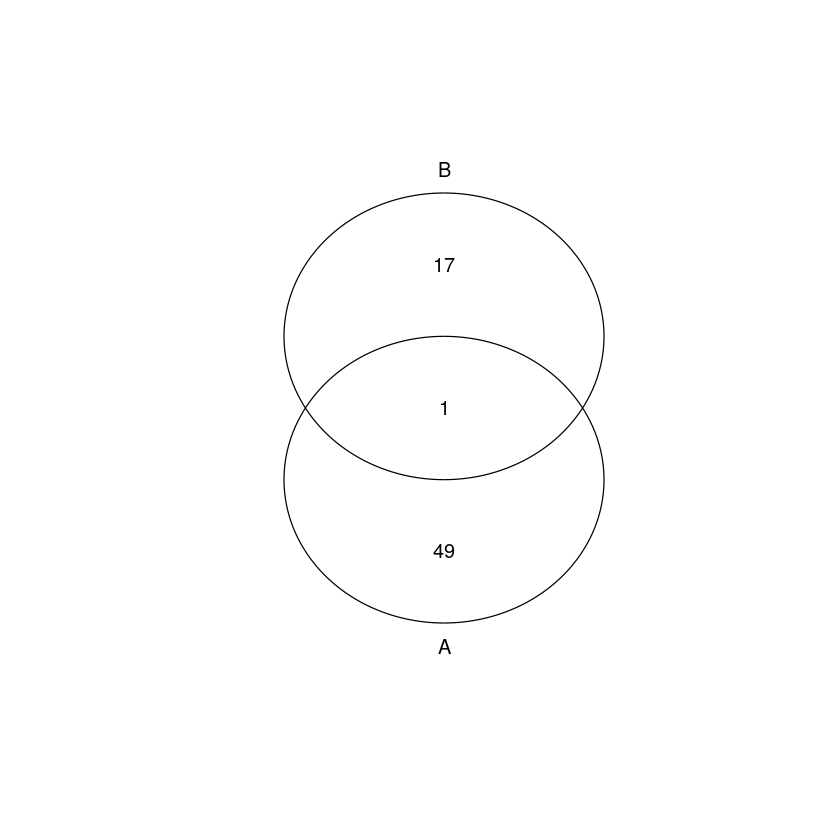

[1] "Hippocampal_Granule_Cell"


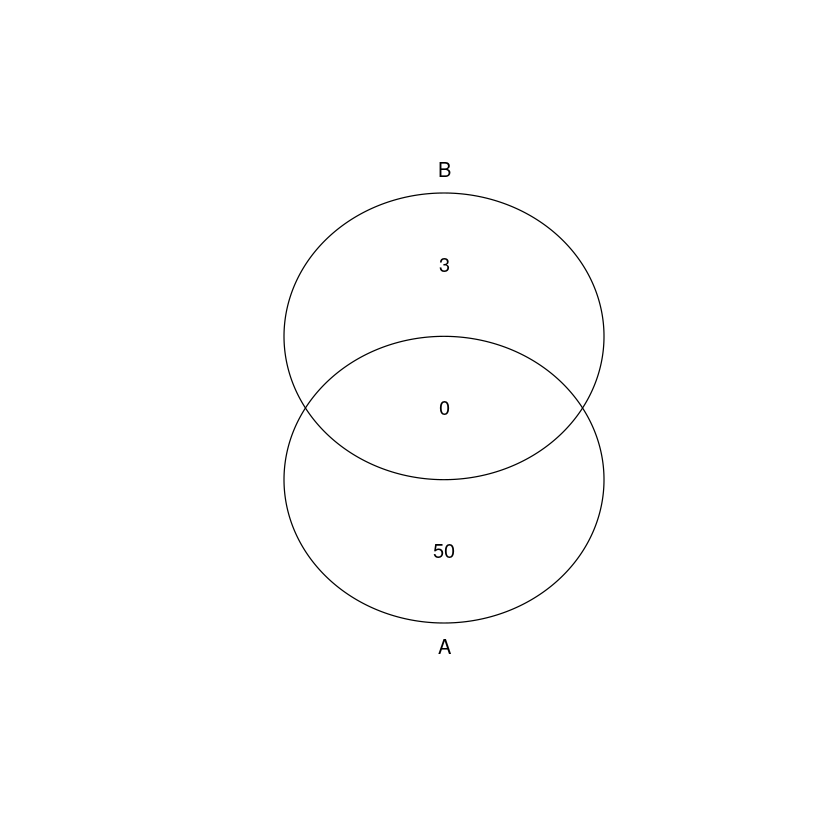

[1] "Hippocampal_Pyramidal_Cell"


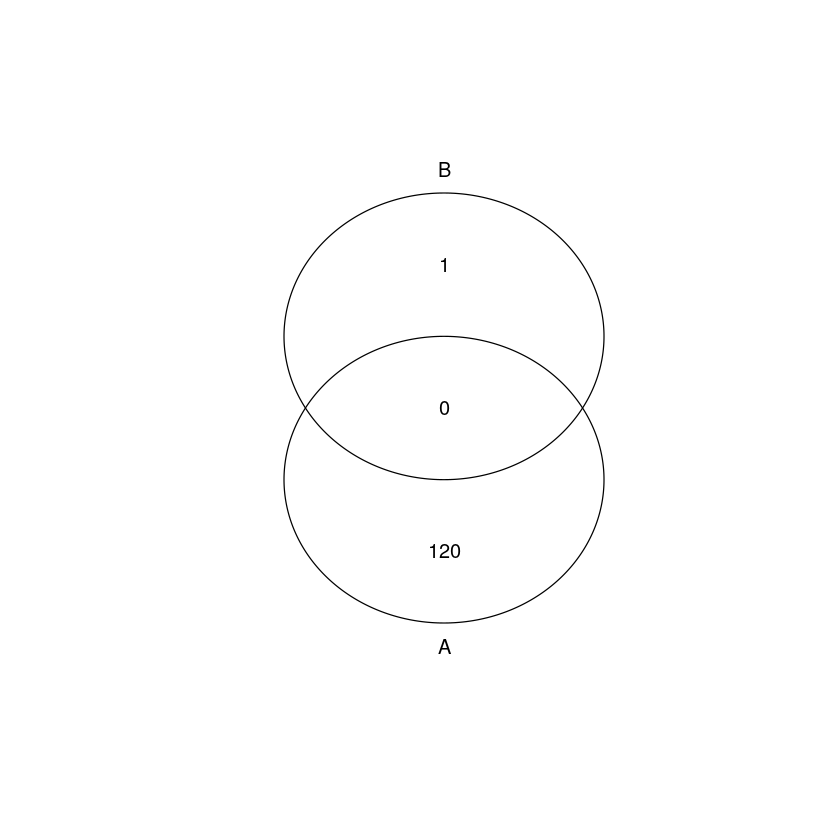

[1] "Interneuron"


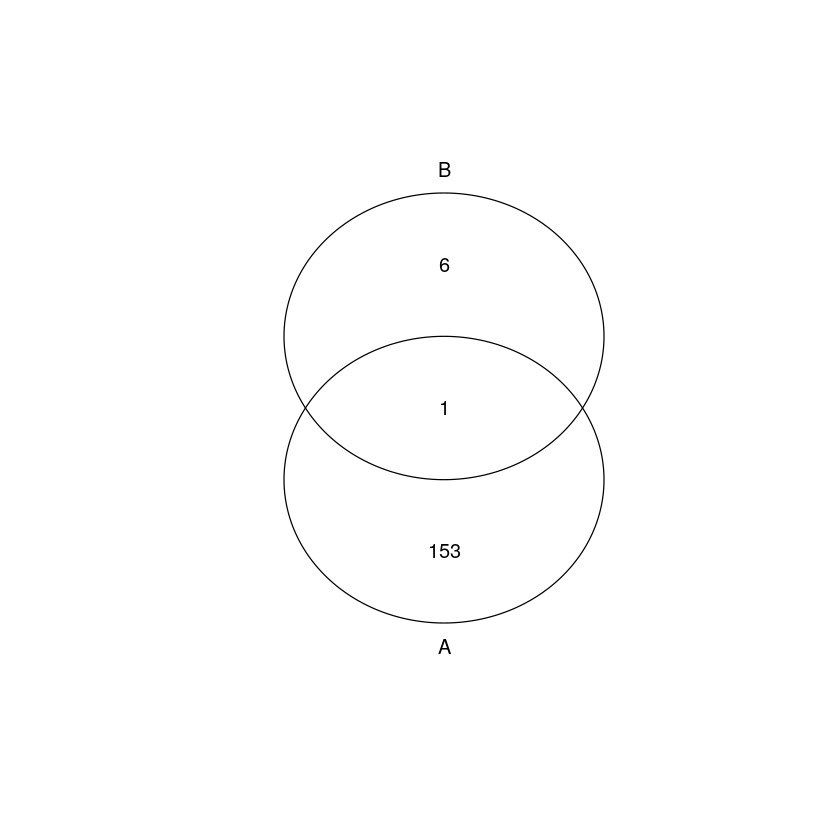

[1] "Mature_Oligodendrocyte"


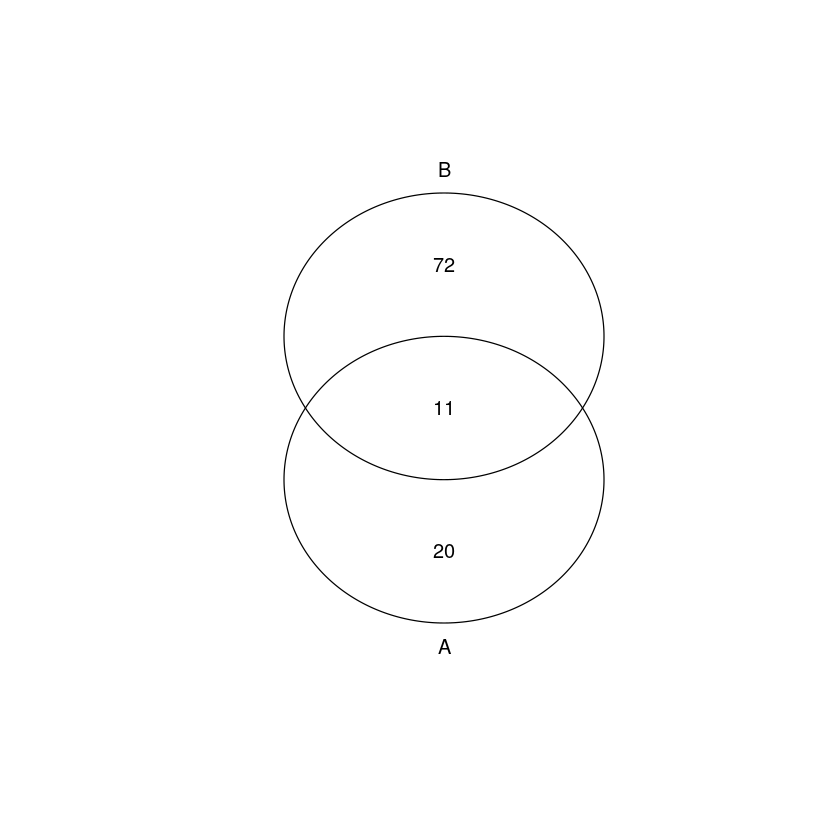

[1] "Medium_Spiny_Neuron"


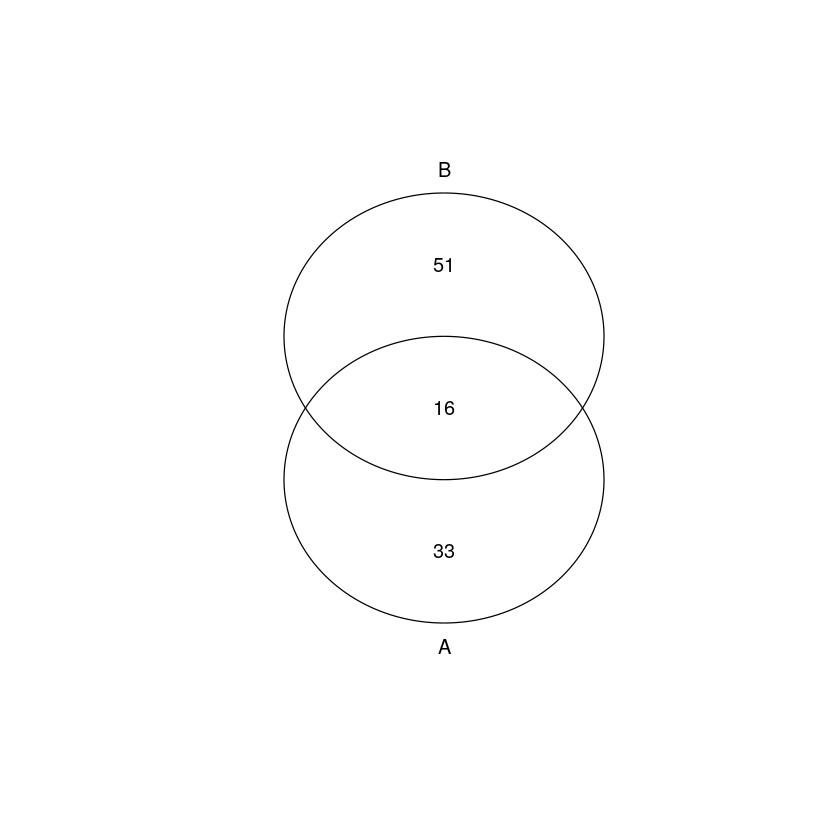

[1] "Microglia_Etc."


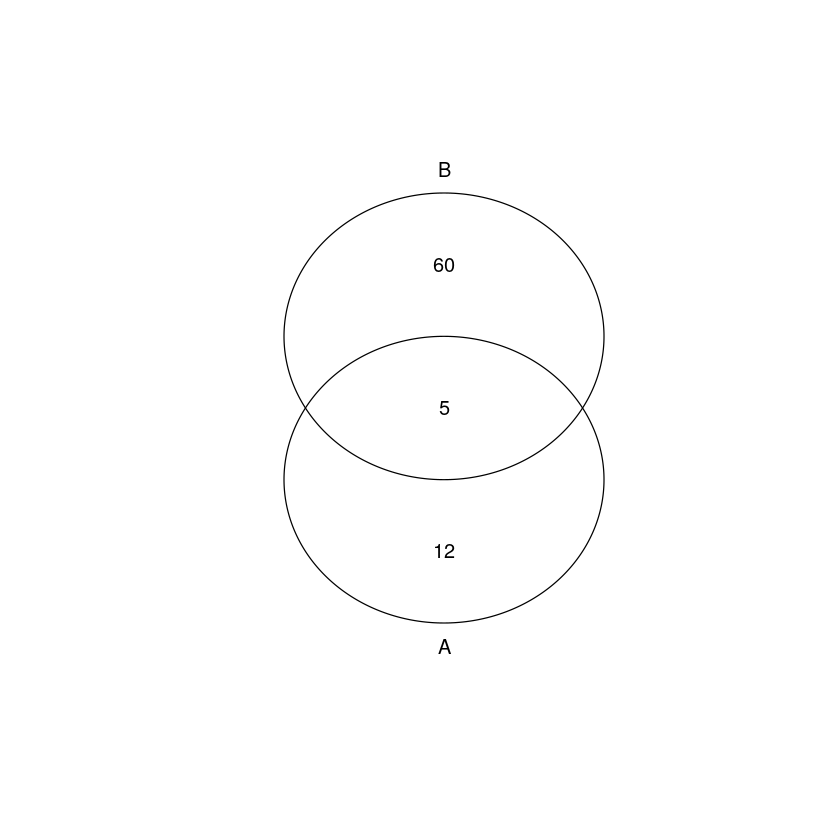

[1] "Neonatal_Astrocyte"


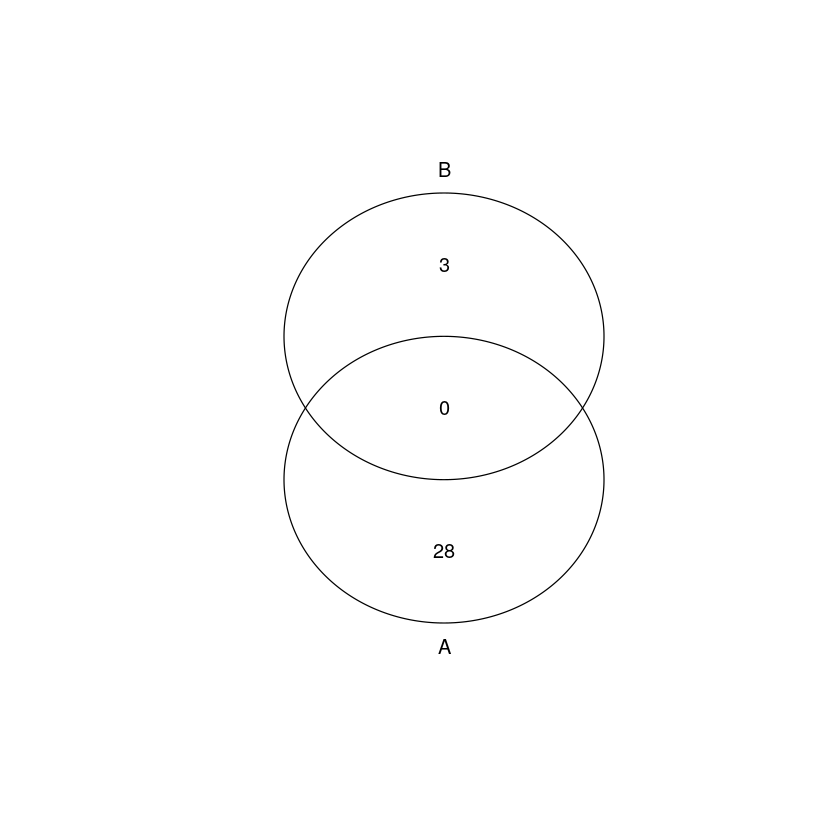

[1] "Neonatal_Neuron_1"
[1] "Neonatal_Neuron_2"


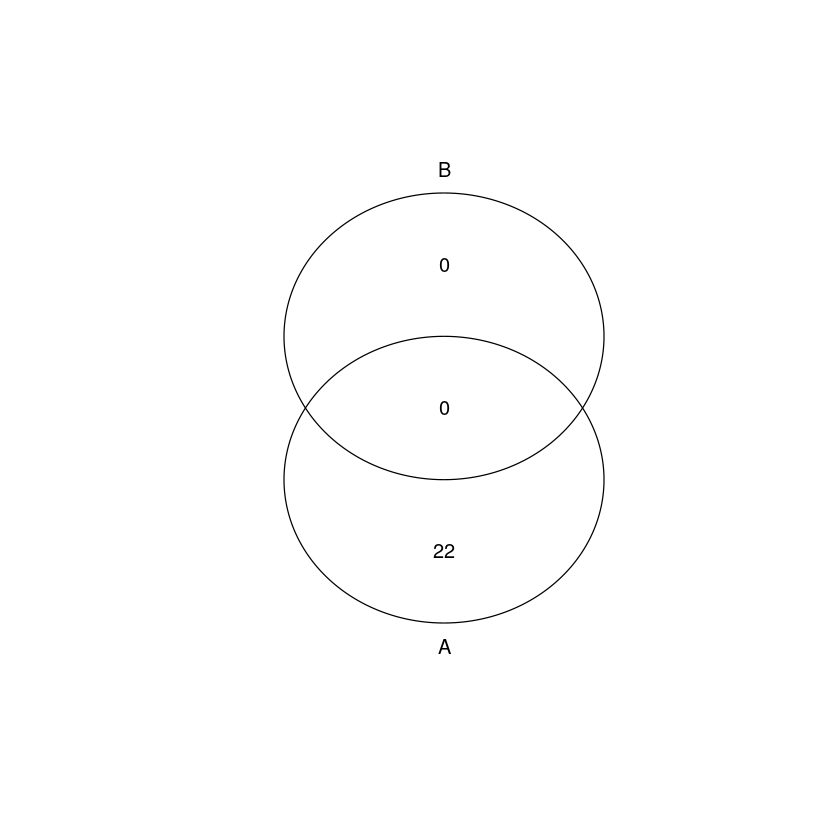

[1] "Neuron"


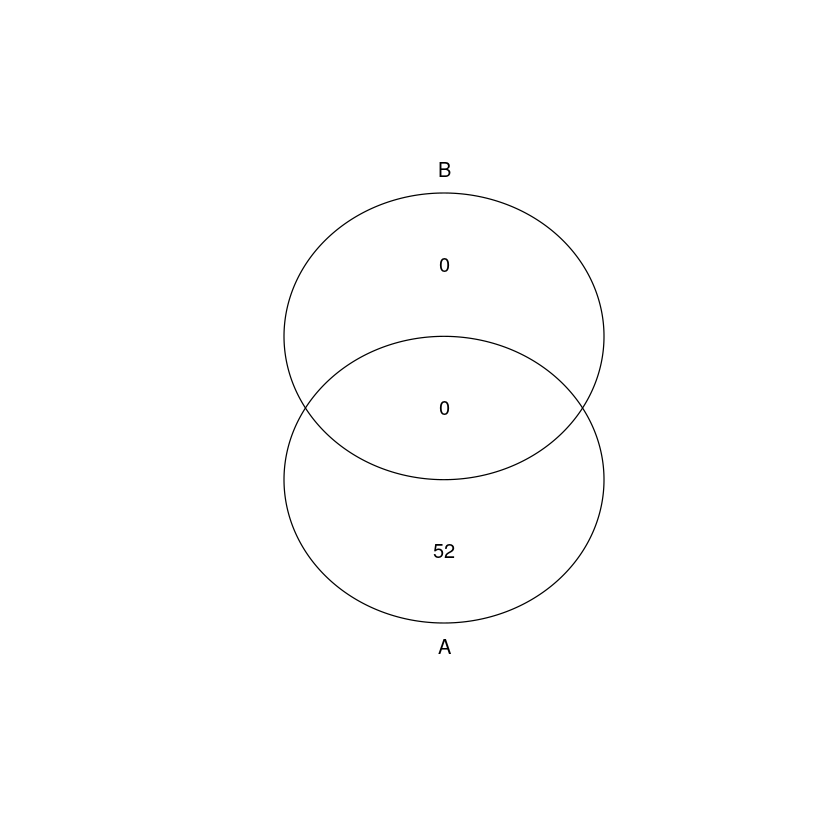

[1] "Oligodendrocyte_Progenitor"


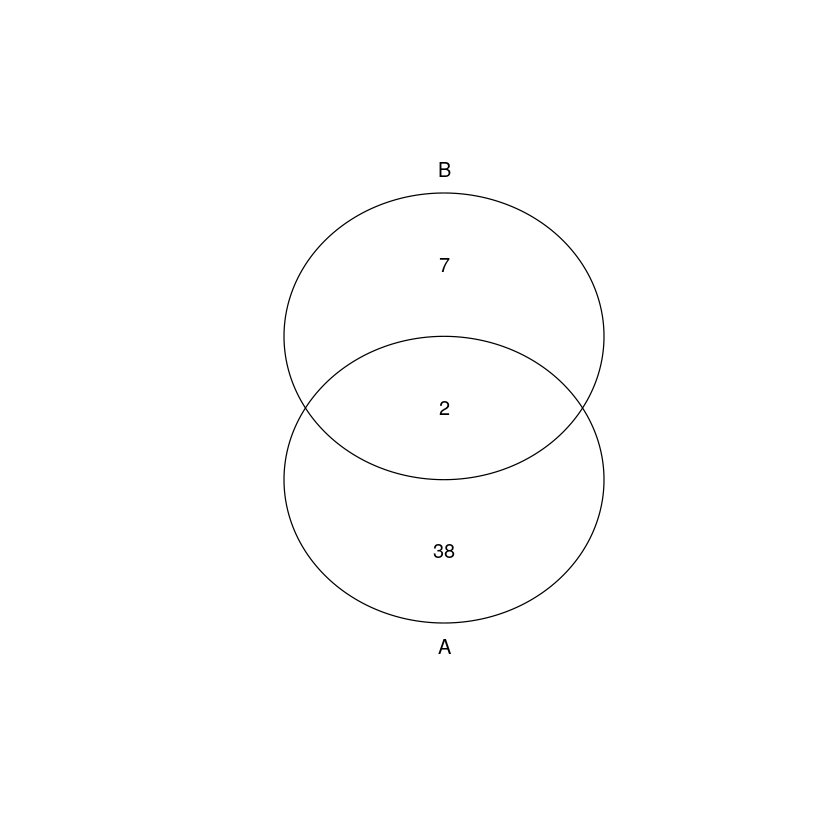

In [12]:
library(gplots)
for (i in 1:length(names(gene_lists))){
    tan = gene_lists[[names(gene_lists)[i]]]
    markers = rownames(pbmc.markers)[pbmc.markers$cluster == names(gene_lists)[i]]
    input = list(tan, markers)
    venn(input)
    print(names(gene_lists)[i])
}

In [74]:
cell_types = as.character(unique(pbmc.markers$cluster))
gene_lists = list()
for (i in 1:length(cell_types)){
    temp = pbmc.markers[pbmc.markers$cluster == cell_types[i], ]$gene
    temp2 = all_genes
    temp2[names(temp2) %in% temp] = 1
    gene_lists[[cell_types[i]]] = temp2
}

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and

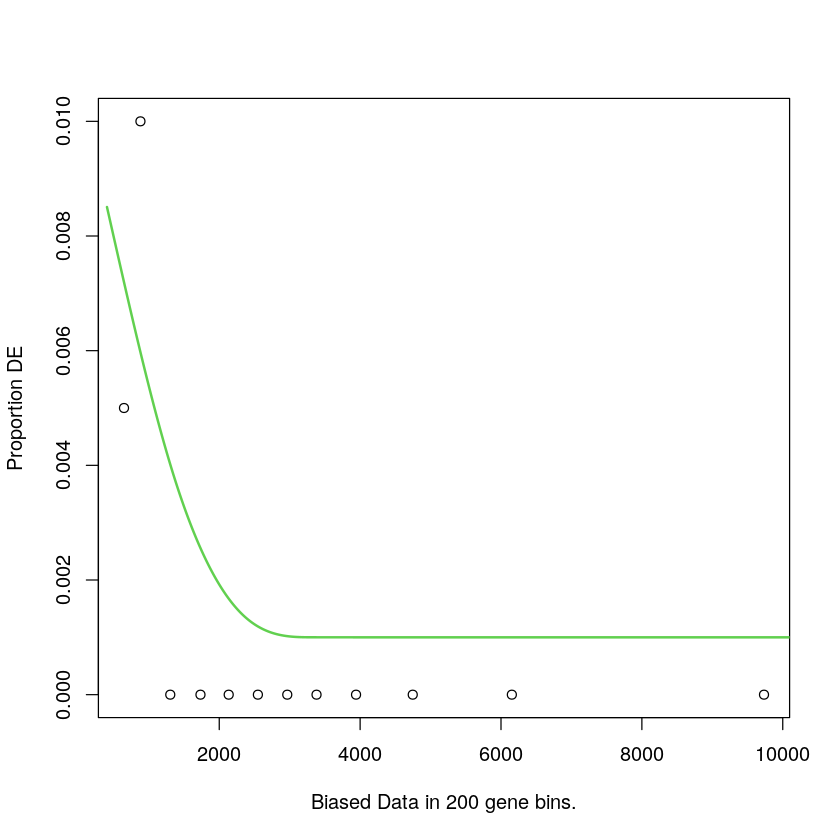

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



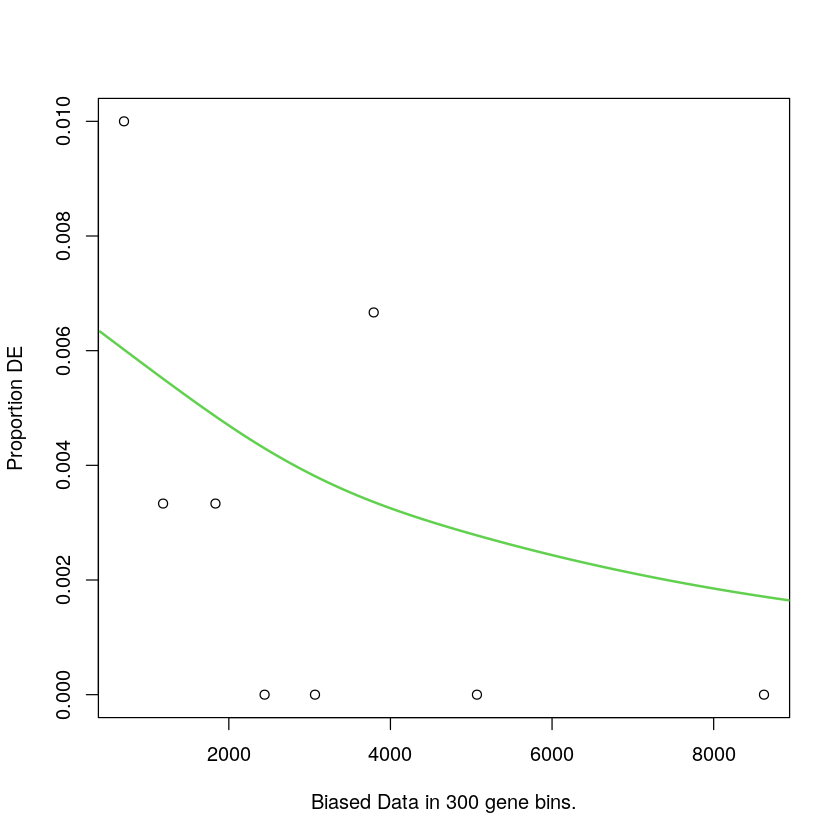

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



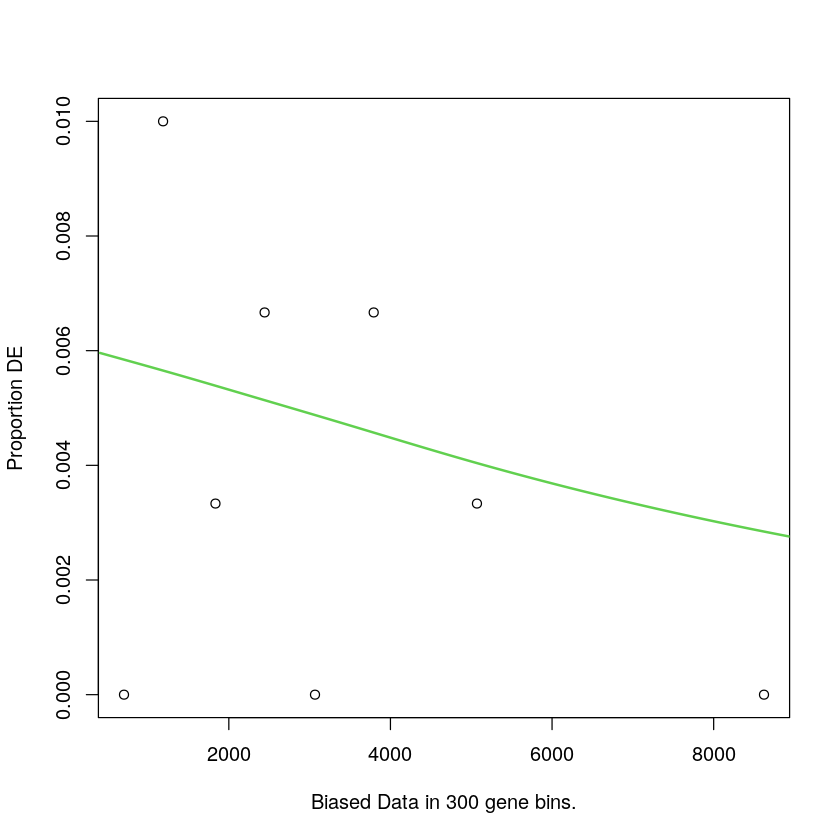

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
“initial point very close to some inequality constraints”


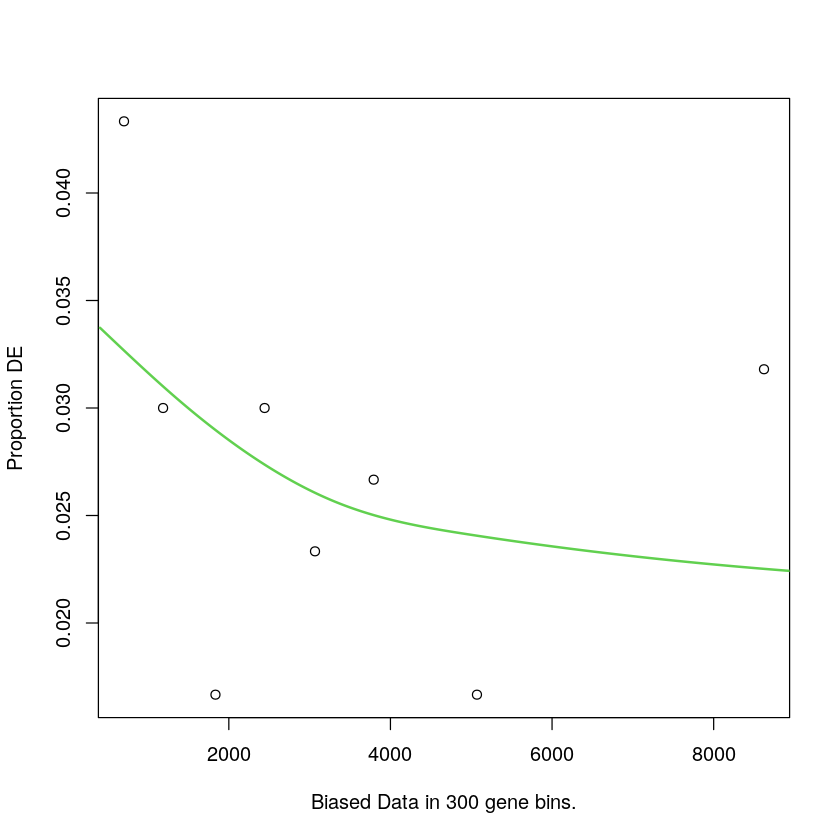

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
“initial point very close to some inequality constraints”


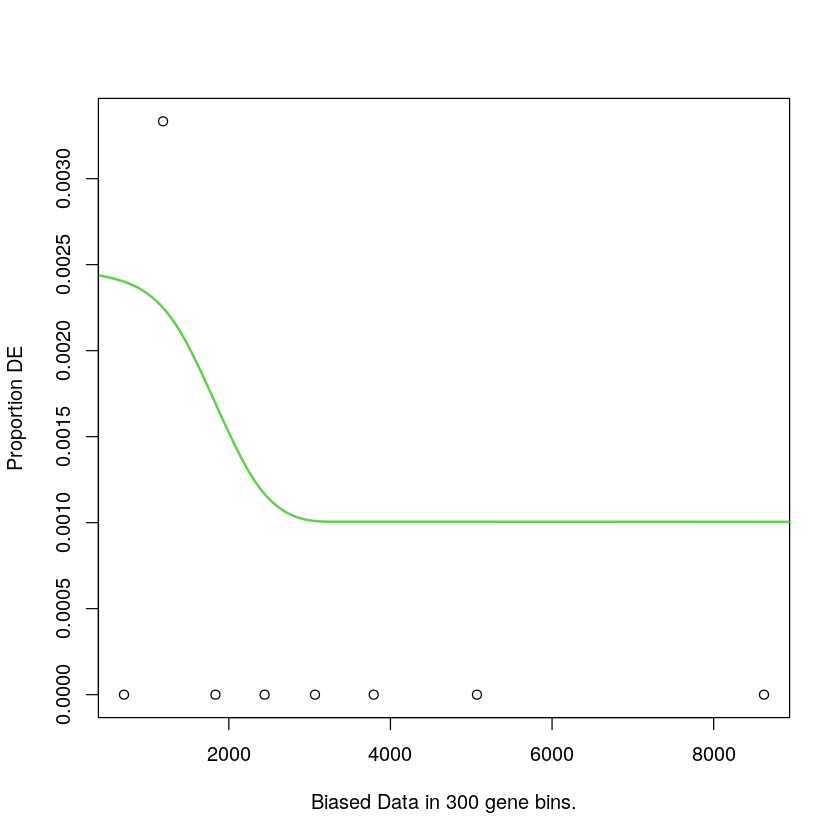

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



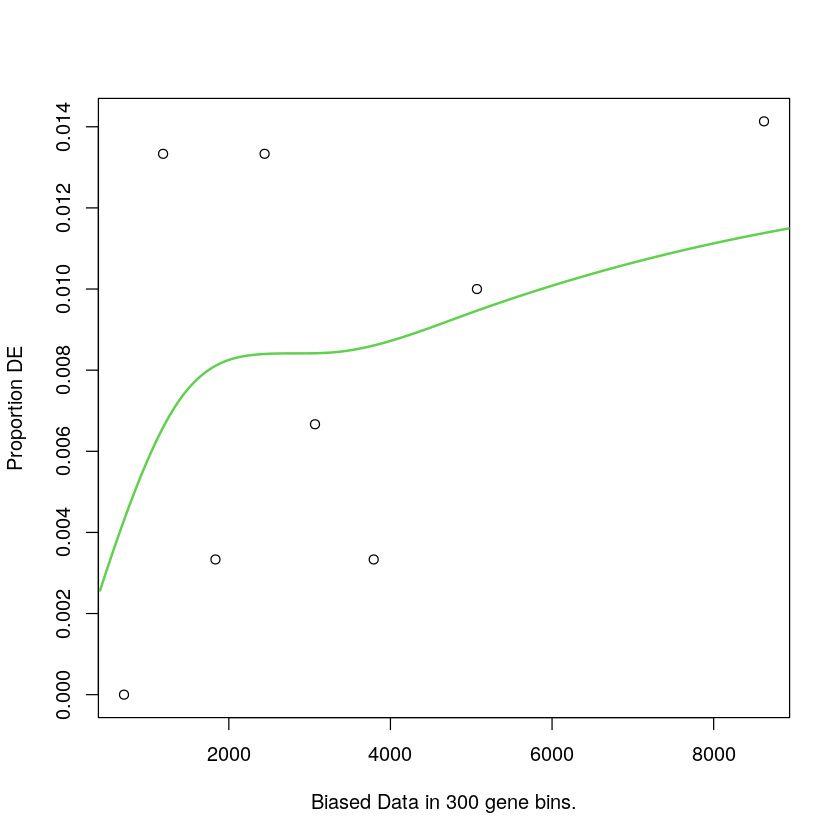

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



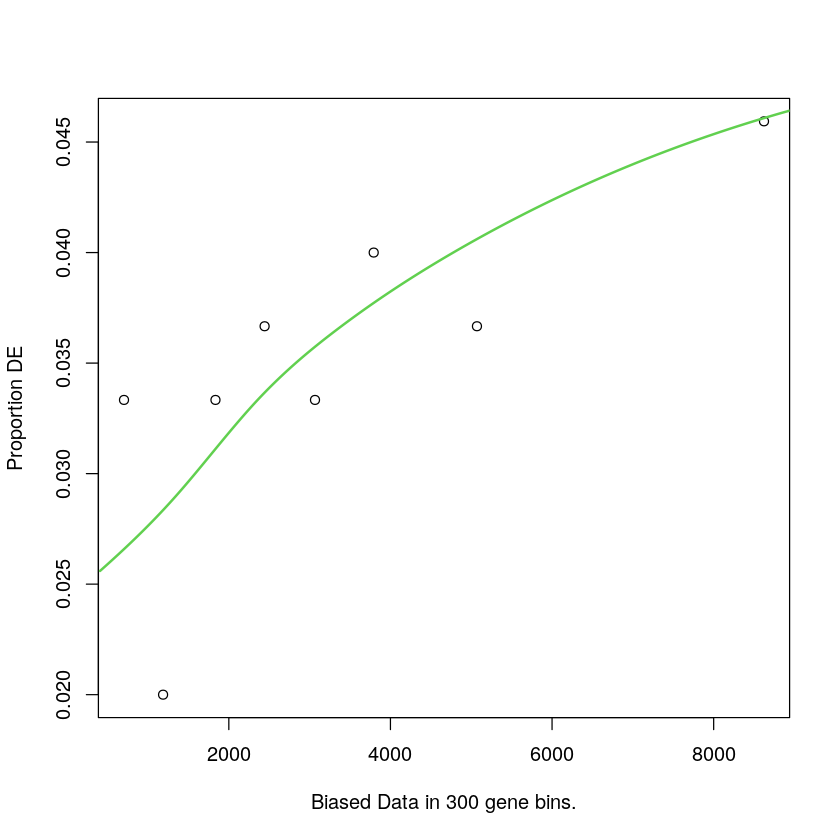

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



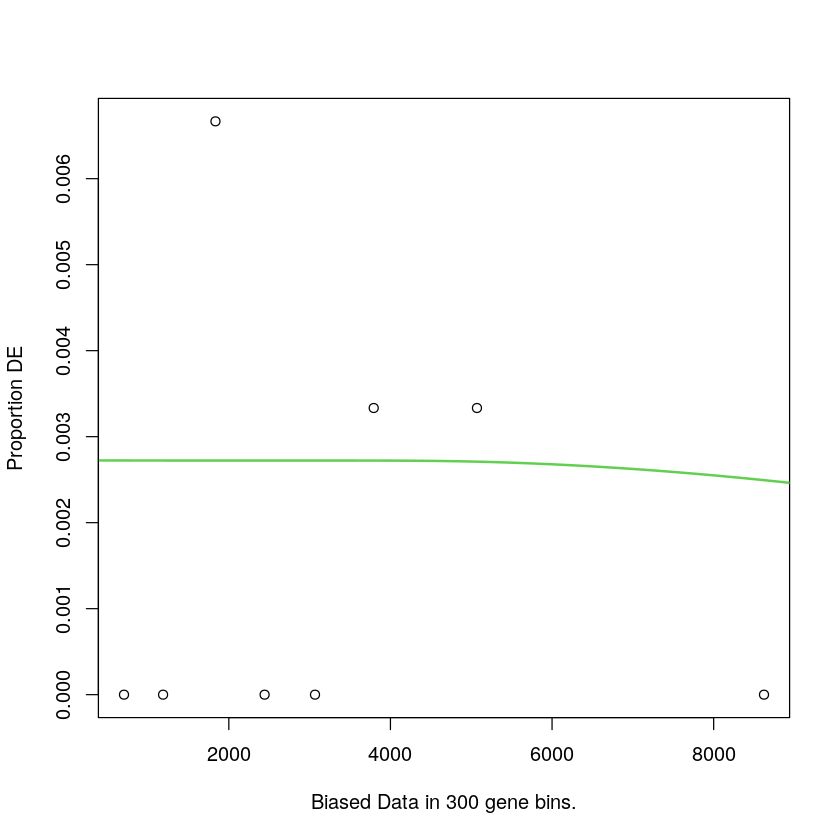

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
“initial point very close to some inequality constraints”


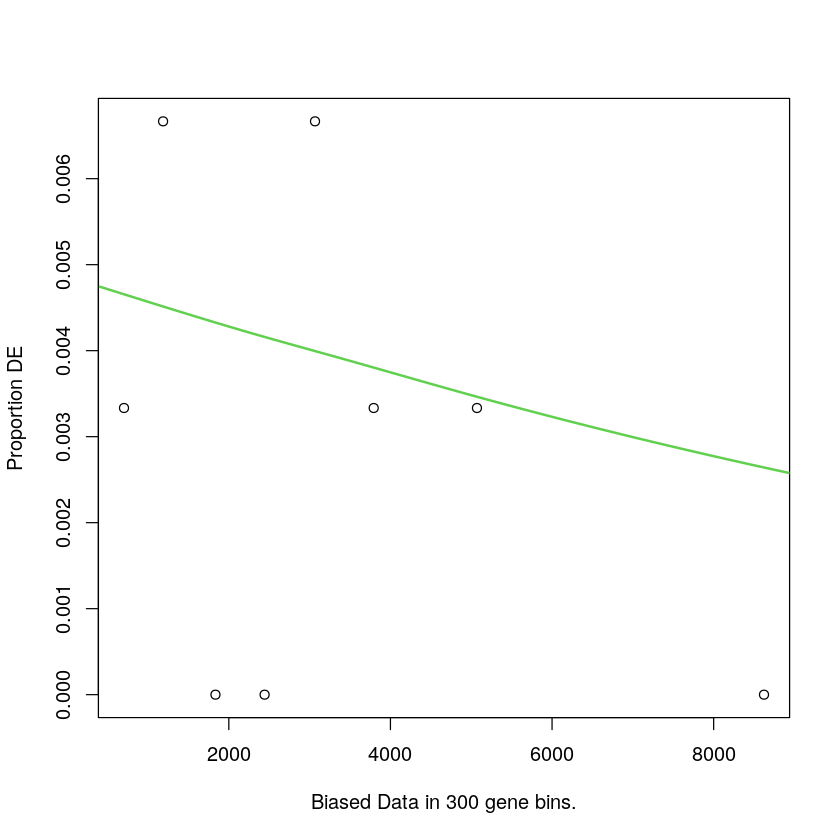

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.



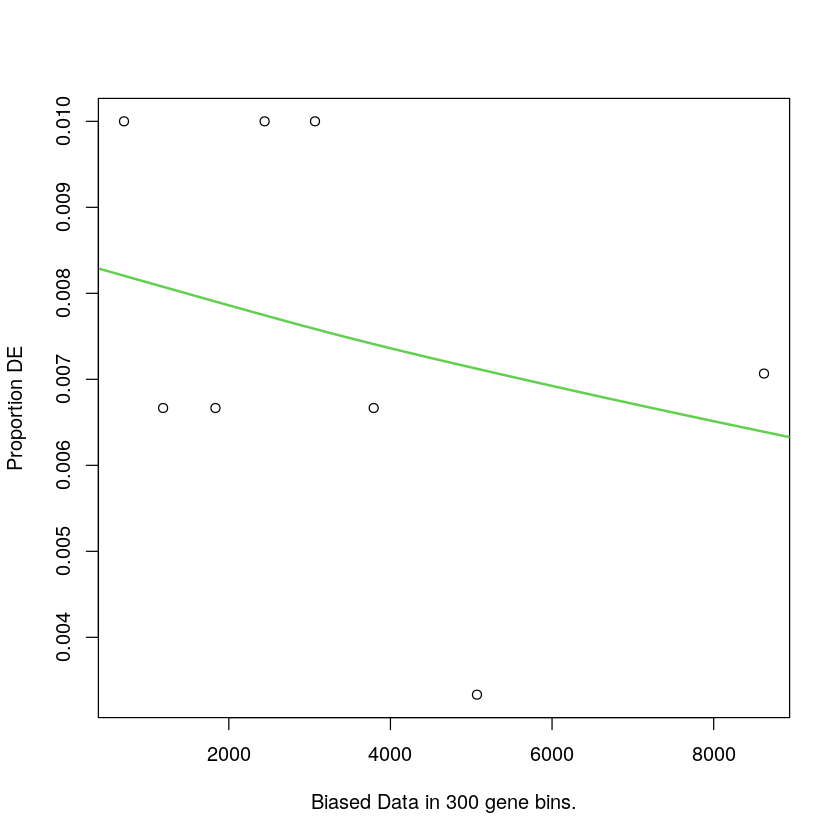

Fetching GO annotations...

For 14 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



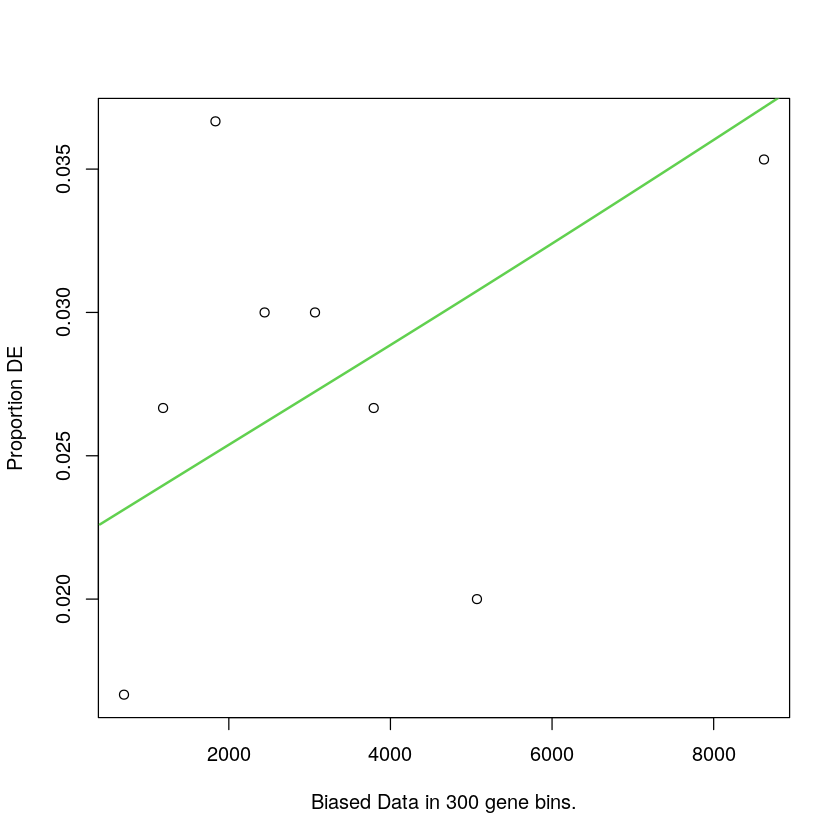

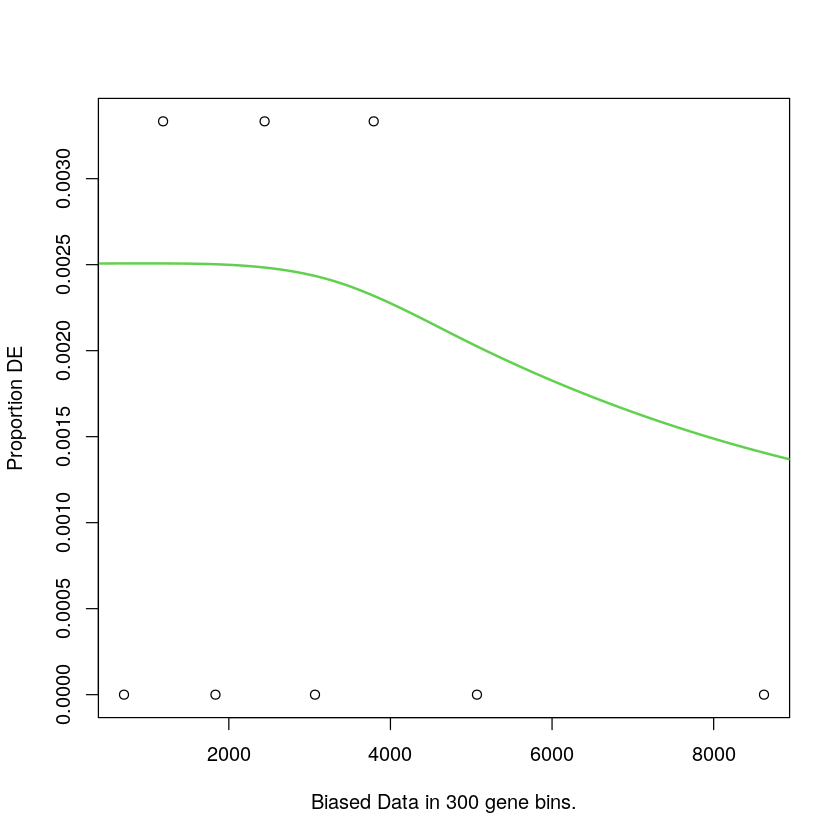

In [76]:
GO_results = list()

for (i in 1:length(gene_lists)){
    pwf=nullp(gene_lists[[i]],"mm10","ensGene")
    GO_results[[names(gene_lists)[i]]] = goseq(pwf,"mm10","ensGene")
}
save(GO_results, file = "/Tan2021/GO_results.RData")

In [77]:
load("/Tan2021/GO_results.RData")


In [84]:
for (i in 1:length(names(GO_results))){
    GO_results[[i]] = GO_results[[i]][1:10, ]
}

Neonatal Astrocyte: Mostly muscle and skeleton related.

<span style="color:blue">Unknown: Don't understand it even after looked at the dictionary.</span>

Oligodendrocyte Progenitor: Immune; regulation of palmitoyltransferase and phosphatidyltransferase activity.

<span style="color:blue">Microglia Etc.: Several different ontologies. Need further scrutinizing.</span>

Hippocampal Pyramidal Cell: DNA repair complex; end joining; end binding.

Cortical L2–5 Pyramidal Cell: Translocation; transport.

Mature Oligodendrocyte: Endocytosis; proteolysis; conjugating enzyme binding.

<span style="color:blue">Adult Astrocyte: Several different ontologies. Need further scrutinizing.</span>

<span style="color:blue">Interneuron: Several different ontologies. Need further scrutinizing.</span>

Cortical L6 Pyramidal Cell: G1 to G0 transition; regulation of cristae formation; membrane.

Medium Spiny Neuron: Response to dopamine; cellular response to some compounds; signaling.

Hippocampal Granule Cell:Immunity; phosphatase activity; regulation of neutrophil differentiation; inositol-1,4,5-trisphosphate 5-phosphatase activity.